<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/potential_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import matplotlib.animation as animation
import numexpr as ne

In [ ]:
# hyper parameters
k = 2
size = 1000
seed = 42

In [ ]:
dim = 2

In [ ]:
#X_train = torch.tensor([[-1,0],[1,1],[2,0],[1,-2]])
#X_train = torch.tensor([[1,2],[-1,0],[0,-2],[0,1],[2,-1],[2,0],[1,0],[-1,-1]])
X_train = torch.randint(-10,10,(100,2))
X_train.shape

torch.Size([100, 2])

In [ ]:
#y_train = torch.tensor([0,0,1,1])
y_train = torch.cat((torch.zeros(50), torch.ones(50)), dim=0)
y_train.shape

torch.Size([100])

In [ ]:
def get_cof(object_index, plan_matrix):
    i0 = 1
    i1 = 4 * plan_matrix[object_index,0]
    i2 = 4 * plan_matrix[object_index,1]
    i3 = 16 * plan_matrix[object_index,1] * plan_matrix[object_index,0]
    return i0, i1, i2, i3

In [ ]:
prev_cof = torch.zeros(4)
sign = 1
#while sign != 0:
index = 0
for i in range(len(X_train)-1):
    new_cof = torch.tensor(get_cof(index, plan_matrix=X_train))
    cof = prev_cof + sign * new_cof
    prev_cof = cof
    print(cof)
    index += 1
    k = cof[0] + cof[1] * X_train[index,0] + cof[2] * X_train[index,1] + cof[3] * X_train[index,0] * X_train[index,1]

    if k < 0 and y_train[index] == 0:
        sign = 1
    elif k > 0 and y_train[index] == 1:
        sign = -1
    else:
        sign = 0

tensor([   1.,   36.,  -12., -432.])
tensor([  2.,   8., -40., 352.])
tensor([  2.,   8., -40., 352.])
tensor([  2.,   8., -40., 352.])
tensor([  2.,   8., -40., 352.])
tensor([  2.,   8., -40., 352.])
tensor([  3.,  16., -56., 224.])
tensor([  4., -20., -48., -64.])
tensor([  4., -20., -48., -64.])
tensor([  5., -16., -48., -64.])
tensor([  5., -16., -48., -64.])
tensor([  5., -16., -48., -64.])
tensor([  6., -20., -80.,  64.])
tensor([   7.,  -12., -116., -224.])
tensor([   7.,  -12., -116., -224.])
tensor([   8.,  -24., -140.,   64.])
tensor([   9.,    4., -176., -944.])
tensor([   9.,    4., -176., -944.])
tensor([   9.,    4., -176., -944.])
tensor([  10.,   40., -156., -224.])
tensor([  10.,   40., -156., -224.])
tensor([  11.,   56., -132.,  160.])
tensor([  11.,   56., -132.,  160.])
tensor([  11.,   56., -132.,  160.])
tensor([  12.,   80., -152., -320.])
tensor([  12.,   80., -152., -320.])
tensor([  13.,  116., -132.,  400.])
tensor([  14.,   92., -112.,  -80.])
tensor([  15

In [ ]:
i = 0
cof[0] + cof[1]*X_train[i,0] +cof[2]*X_train[i,1]+cof[3]*X_train[i,0]*X_train[i,1]

tensor(-1275.)

In [ ]:
X_test = torch.randint(-10,10,(size,dim))
#X_test = torch.randn((size,dim))
y_test = torch.zeros(size)
X_test.shape, y_test.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
for j in range(len(X_test)):
    y_test[j] = 1 if cof[0] + cof[1]*X_test[j,0] +cof[2]*X_test[j,1]+cof[3]*X_test[j,0]*X_test[j,1] < 0 else 0

In [ ]:
for j in range(len(X_train)):
    y_train[j] = 1 if cof[0] + cof[1]*X_train[j,0] +cof[2]*X_train[j,1]+cof[3]*X_train[j,0]*X_train[j,1] < 0 else 0

In [ ]:
X = torch.linspace(-10,10,size)
Y = torch.zeros(size)
X.shape, Y.shape

(torch.Size([1000]), torch.Size([1000]))

In [ ]:
for i in range(len(X)):
    Y[i] = -(cof[0]+cof[1]*X[i])/(cof[2]+cof[3]*X[i])

(-10.0, 10.0)

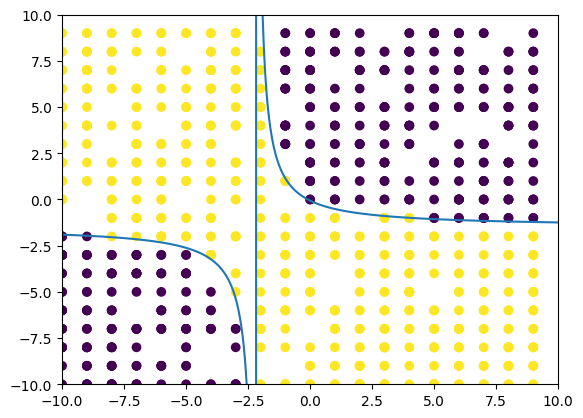

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.plot(X,Y)
plt.xlim(-10,10)
plt.ylim(-10,10)

(-10.0, 10.0)

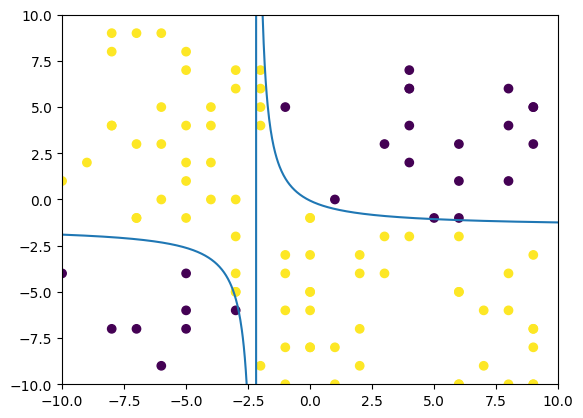

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot(X,Y)
plt.xlim(-10,10)
plt.ylim(-10,10)